In this assignment we will work with several real psycholinguistics datasets. These datasets are inspired by discussion in this [book](https://osf.io/pnumg/) by McGill Linguistics Professor Morgan Sondregger. 

The first part of the problem set will examine some lexical decision data. You can read about lexical decision experiments in the wikipedia article [here](https://en.wikipedia.org/wiki/Lexical_decision_task). (The first dataset also contains so-called *speeded naming* data. You can read about that in the speeded naming section of the first paper.)

The collection of the lexical decision data is originally described in. 

Balota, D. A., Cortese, M. J., Sergent-Marshall, S. D., Spieler, D. H., and Yap, M. J. (2004). [Visual word recognition of single-syllable words](https://drive.google.com/file/d/1TkFrg1jg0AK-9ZnKU5YXNVubdVUeNXbL/view?usp=sharing/). Journal of Experimental Psychology: General, 133(2):283–316.

In the following paper, this data was reanalyzed using some new features (predictors).

R. H. Baayen, L. Feldman, and R. Schreuder. [Morphological Influences on the Recognition of Monosyllabic Monomorphemic Words](https://drive.google.com/file/d/1USv3o6PXzocFtSggbcFn2fxYYrJ-pBcI/view?usp=sharing). Journal of Memory and Language, 53:496– 512, 2006. You can find a copy of this paper.

This data is discussed in Harald Baayen's book on linguistic data analysis.

Baayen, R. H. (2008). [Analyzing Linguistic Data: A practical introduction to statistics](https://drive.google.com/file/d/1RnQLXbzMARsEm8s8PFTYiSlaMc-vZ8Xa/view?usp=sharing). Cambridge University Press.

This particular file  was derived from the original data available as as the `english` dataframe of the [languageR package](https://cran.r-project.org/web/packages/languageR/index.html/).

Copy the data to your drive folder from: https://drive.google.com/file/d/19ybVdUWwZh_hSw69DRG7rYJd8o5dKWFK/view?usp=sharing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/english.csv"


Mounted at /content/drive/
'/content/drive/My Drive/english.csv'


Use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to read the CSV file into a dataframe and then have a look at the data set.

In [ ]:
#Problem 1: Put your answer here
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/english.csv")
df.head(10)


,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,DerivationalEntropy,InflectionalEntropy,NumberSimplexSynsets,NumberComplexSynsets,LengthInLetters,Ncount,MeanBigramFrequency,FrequencyInitialDiphone,ConspelV,ConspelN,ConphonV,ConphonN,ConfriendsV,ConfriendsN,ConffV,ConffN,ConfbV,ConfbN,NounFrequency,VerbFrequency,CV,Obstruent,Frication,Voice,FrequencyInitialDiphoneWord,FrequencyInitialDiphoneSyllable,CorrectLexdec
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294,0.14144,0.02114,0.693147,0.000000,3,8,7.036333,12.02268,10,3.737670,41,8.837826,8,3.295837,0.693147,2.708050,3.496508,8.833900,49,0,C,obst,burst,voiced,10.129308,10.409763,27
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438,0.06197,1.44339,2.484907,1.945910,6,0,9.883931,13.30069,10,6.693324,13,7.040536,10,6.693324,0.000000,0.000000,1.386294,5.817111,565,473,C,obst,frication,voiceless,12.422026,13.127395,30
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910,0.43035,0.00000,1.098612,2.639057,4,8,8.309180,12.07807,5,6.677083,6,3.828641,4,3.526361,0.693147,6.634633,1.098612,2.564949,150,0,C,obst,burst,voiceless,10.048151,11.003649,30
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225,0.35920,1.75393,2.484907,2.484907,4,3,7.943717,11.92678,17,4.762174,17,4.762174,17,4.762174,0.000000,0.000000,0.000000,0.000000,170,120,C,obst,burst,voiceless,11.796336,12.163092,26
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294,0.06268,1.74730,1.609438,1.386294,4,9,8.349620,12.19724,19,6.234411,21,6.249975,19,6.234411,0.000000,0.000000,1.098612,2.197225,125,280,C,obst,burst,voiceless,11.991567,12.436772,28
5,6.370586,6.123808,3.73,dawn,young,N,6.383507,-0.015421,1.098612,0.00000,0.77898,1.791759,1.098612,4,6,7.699792,11.32815,10,4.779123,13,8.864323,10,4.779123,0.000000,0.000000,1.386294,8.847504,582,110,C,obst,burst,voiced,9.408125,9.772410,30
6,6.266859,6.096050,5.67,dog,young,N,7.159292,-1.048219,3.688879,1.03052,1.05129,2.079442,4.465908,3,13,7.139341,12.02268,13,4.795791,7,4.770685,6,3.761200,1.945910,1.386294,0.000000,0.000000,2061,76,C,obst,burst,voiced,9.755336,10.255024,28
7,6.608648,6.117657,3.10,arc,young,N,4.890349,2.916268,1.609438,0.15894,0.57715,1.609438,2.079442,3,3,7.747861,13.29079,1,3.737670,11,6.091310,0,0.000000,0.000000,0.000000,2.397895,5.993961,144,4,V,cont,long,voiced,6.424869,6.538140,25
8,6.284843,6.179188,4.43,skirt,young,N,5.929589,-0.078733,1.791759,0.06664,1.34797,1.945910,2.079442,5,3,8.561149,10.38890,7,4.624973,14,5.164786,7,4.624973,0.000000,0.000000,2.079442,4.304065,522,86,C,obst,frication,voiceless,11.129011,11.578563,29
9,6.607164,6.196648,3.27,spree,young,N,3.401197,1.427116,0.693147,0.00000,0.44886,1.098612,0.000000,5,1,9.153887,11.50982,15,7.513709,38,10.132812,14,7.513709,0.693147,0.000000,3.218876,10.057195,32,0,C,obst,frication,voiceless,12.030051,12.492844,24


Your first job is to familiarize yourself with the dataset by briefly examining the two papers above. First, read the wikipedia article on lexical decision, and briefly (2-4 sentences) explain the lexical decision experimental task.

**Q1: The lexical decision experimental task is a procedure involves measuring how quickly people classify stimuli as words or nonwords, it is used in many psychology and psycholinguistics experiments. Participants are presented with mixture of words and nonwords, and it's their task to determine whether the string is a word or not.**

Start with the earlier paper then move on to the later paper. Note these two papers are long and use a lot of technical jargon from the field of psycholinguistics. *Reading each paper carefully would take several hours and you probably would not be able to understand everything unless you have previous familiarity with experimental psychology.*  This is not the goal of this part of the assignment. Instead, the goal is to just familiarize yourself as efficiently as possible with what some of the columns in the data set mean. An important skill in data science is quickly evaluating the high level idea and questions studied in a paper and finding the places where quantitites are defined, without doing a careful reading.

A good way to approach this is to first read the abstract, the introduction and the conclusion and then have a look at the figures, always keeping in mind the data from the CSV above and trying to find interpretations for the various columns. Don't get stuck on stuff you don't understand unless you are pretty sure you need to understand it to answer the question.

Focus on figuring out where you can find the relevant information to answer the following questions. 

***Question 2:*** In these studies and in this dataset various regression models are used to analyze the experimental data. What was measured in these studies that corresponds to $\mathbf{y}$ in our notation from class (i.e., the quantities to be predicted) and which columns in the dataset have these values? 

**Q2: 
The relevant variables to be predicted are lexical decision times which re in variable RTlexdec and speeded naming times which are in variable RTnaming**

***Question 3:*** In both papers a number of different quantities are used as predictors for the experimental measures. These correspond to the columns of our $\mathbf{X}$ matrix from class. Note that between these two papers there are a lot of variables, and this a lot of columns in the table. Please determine the meaning of the first seven features from these papers (`Familiarity` to `FamilySize`).

**Q3: Familiarity: it refers to subjective frequency norms
      Word:The word item being used to test the reaciton time
      AgeSubject: It refers to the age group of the participant(young/old)
      WordCategory: the category of the word in the Word column
      WrittenFrequncy: the word frequency in written English 
      WrittenSpokenFrequency: written-to-spoken frequency ratio.
      FamilySize：A word’s morphological family size is the number of complex   word types in which a word occurs as a constituent.**


***Question 4:*** For each of these predictors, how would you intuitively expect it to relate to the reactions times in the $\mathbf{y}$ variables? (Note that there is no right or wrong answer here, so long as you give a justification for your reasoning). Please be brief, no more than 2-4 sentences per predictor.

**Q4: Familiarity: The higher the familiarity is, the lower the reaciton time because it's more likely for the participants to remember the word
AgeSubject: old adult has higher decision time
WordCategory: The difference in lexical decision time between differnt types of words is within the margin of error
WrittenFrequency and WrittenSpokenFrequency:Words used predominantly in written comparing to spoken English tended to have prolonged latencies because it's less likely for the subjects to have contact with it in daily lives
FamilySize:It has a facilitary effect on making lexical decision because the larger the family the size of a word, it's more likely to be known by the subject.**


Let's simplify the dataset a bit, to have fewer columns. 

In [ ]:
# Problem 2: Write some code that drops all of the columns from the 
# English dataset past the 9th column (the last column should be FamilySize)
df = df.drop(df.columns[list(df.columns).index("FamilySize")+1:],axis=1)
df.head(10)

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294
5,6.370586,6.123808,3.73,dawn,young,N,6.383507,-0.015421,1.098612
6,6.266859,6.096050,5.67,dog,young,N,7.159292,-1.048219,3.688879
7,6.608648,6.117657,3.10,arc,young,N,4.890349,2.916268,1.609438
8,6.284843,6.179188,4.43,skirt,young,N,5.929589,-0.078733,1.791759
9,6.607164,6.196648,3.27,spree,young,N,3.401197,1.427116,0.693147


Now use the [Seaborn library](https://seaborn.pydata.org/) to produce a set of plots between (see `pairplot`) all the variables in the dataset.

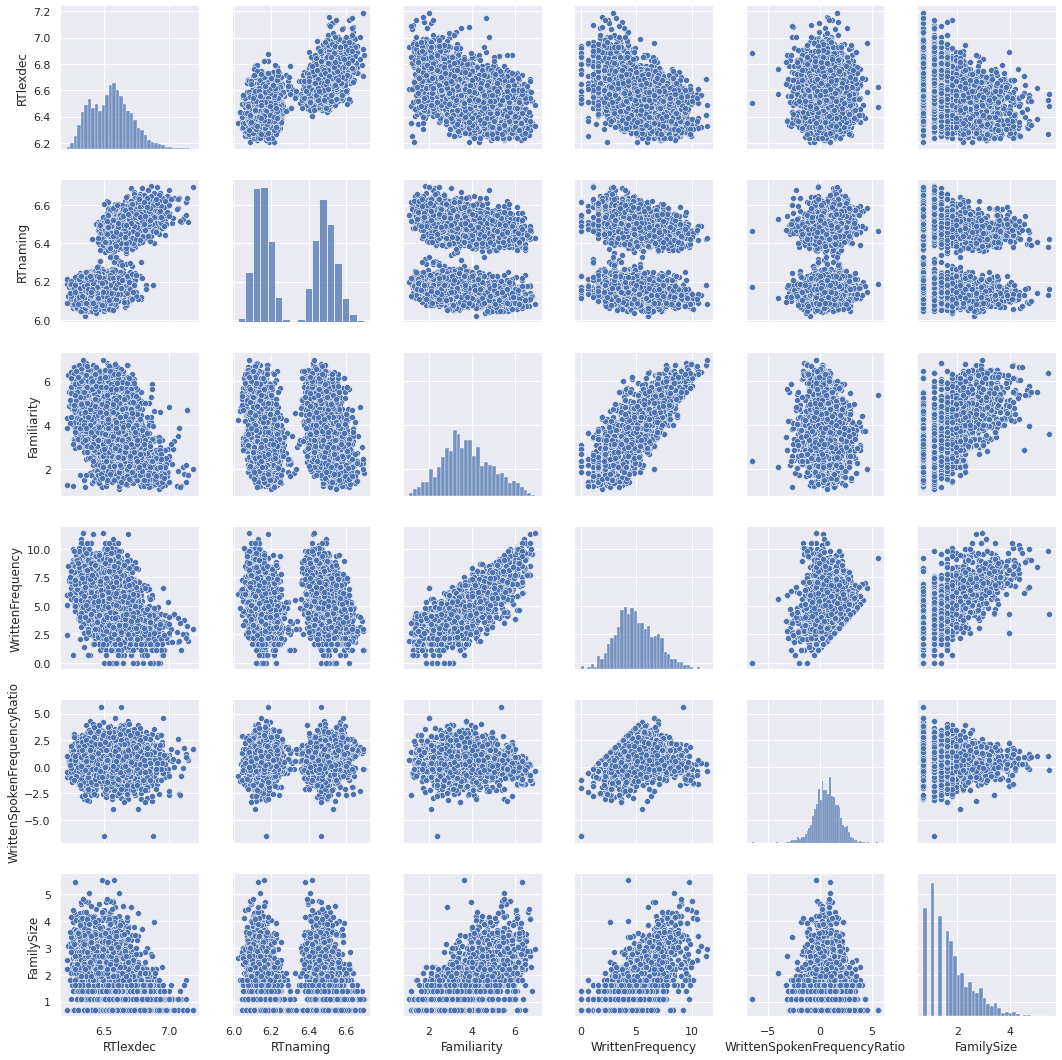

In [ ]:
import seaborn as sns; sns.set()
sns.pairplot(df)

Let's focus on the subset of the data from young participants.

In [ ]:
# Problem 3: Write an expression that selects the subset of rows which correspond to the young speakers.
young = df[df["AgeSubject"] == "young"]
print(young)

      RTlexdec  RTnaming  ...  WrittenSpokenFrequencyRatio FamilySize
0     6.543754  6.145044  ...                     1.021651   1.386294
1     6.304942  6.143756  ...                     2.089356   1.609438
2     6.424221  6.131878  ...                    -0.526334   1.945910
3     6.450597  6.198479  ...                    -1.044545   2.197225
4     6.531970  6.167726  ...                     0.924801   1.386294
...        ...       ...  ...                          ...        ...
3729  6.514031  6.144615  ...                    -1.686399   1.386294
3730  6.491376  6.145901  ...                     0.436718   1.609438
3731  6.360318  6.089498  ...                     0.504395   1.945910
3732  6.319923  6.226537  ...                     0.062801   1.945910
3733  6.392453  6.147399  ...                     1.049822   1.945910

[2283 rows x 9 columns]


Let's examine the relationship between the written frequency of a word on it's 
lexical decision time. Use  [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to make a plot with a linear trend line that 
has the fequency on the $x$-axis and lexical decision time on the $y$-axis.

You may also find this page useful in understanding how to use Seaborne to plot regression lines: https://seaborn.pydata.org/tutorial/regression.html


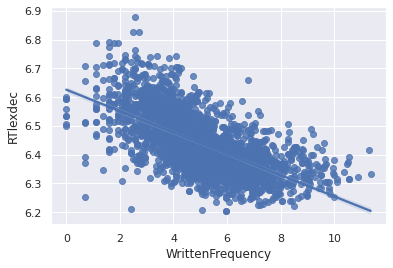

In [ ]:
#Problem 4: use seaborne.regplot to plot the data with a best fit regressions line.
import seaborn as sns; sns.set()

sns.regplot(x="WrittenFrequency", y="RTlexdec",data=young,scatter=True)

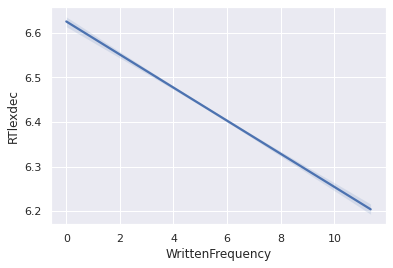

In [ ]:

import seaborn as sns; sns.set()

sns.regplot(x="WrittenFrequency", y="RTlexdec",data=young,scatter=False)

In order to examine wether or the relationship between two variables is really linear, it is useful to look at a *locally-smoothed regression line* that relates the $x$ and $y$ axes of a plot. This is a kind of regression model where the function is refit localy for many subsets of the data then a smooth line is interpolated between these points. One standard technique for this is known as *locally weighted scatterplot smoothing* or [LOWESS](https://en.wikipedia.org/wiki/Local_regression) and is implemented as an option for the line drawn by the `regplot` function. Using this examine whether the relationship between frequency and lexical decision times really looks linear.

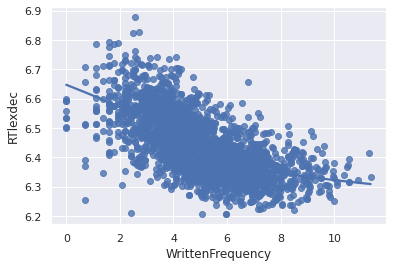

In [ ]:
#Problem 5: use seaborne.regplot to mnake a plot with the best fit LOWESS line.
import seaborn as sns; sns.set()

sns.regplot(x="WrittenFrequency", y="RTlexdec",data=young, lowess=True, scatter=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


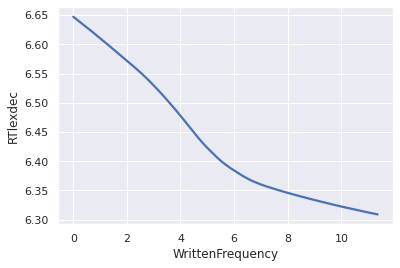

In [ ]:
import seaborn as sns; sns.set()

sns.regplot(x="WrittenFrequency", y="RTlexdec",data=young, lowess=True, scatter=False)

***Question 5***: What do you see in this data when you look at the two plots above? Do you think that a linear model represents the relationship between written frequency and reaction times? It may be useful  to turn on an off the plotting of the underlying data points with the `scatter=False` argument to the functions.

**Q5:The higher the written frequency, the lower the lexical decision time will be, the linear model is not a good representation for the data because the local regression model shows that the relationship between these two variables aren't linear**

Let's try looking at some more complex models of the relationship between frequency and lexical decision time. Here is some starter code similar to those that we looked at in class for writing a polynomial regression. Complete the code as indicated.


Model class: Linear Regression
	Degree 1
		Train R^2: 0.40283651869320086
		Test R^2: 0.49274826222654616
	Degree 2
		Train R^2: 0.4194054339182173
		Test R^2: 0.5236067249464638
	Degree 3
		Train R^2: 0.43763882210466976
		Test R^2: 0.5312961926869213
	Degree 4
		Train R^2: 0.4456409397321034
		Test R^2: 0.5452445605183156
	Degree 5
		Train R^2: 0.44564496449391655
		Test R^2: 0.5451127261910471
	Degree 6
		Train R^2: 0.44713483884376476
		Test R^2: 0.5437579239758795
	Degree 7
		Train R^2: 0.44733656049232173
		Test R^2: 0.5433980771404407
	Degree 20
		Train R^2: 0.44185269522511833
		Test R^2: 0.5202355843962467
	Degree 25
		Train R^2: 0.33247765021094056
		Test R^2: 0.17541118580101733


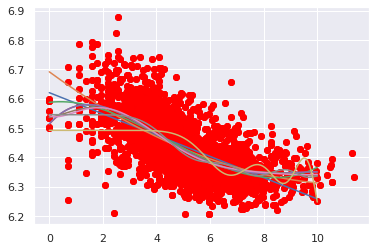

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Problem 6: Set up variable X (For features) and y from the input data.
X = young['WrittenFrequency']
y= young['RTlexdec']



# Problem 7: split this into test and train subsets, with 10% of the data in test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train.ravel(), y_train, color='red')

print("Model class: " + "Linear Regression")
X_train=X_train.values.reshape(-1,1)

y_train=y_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
#X_test=PolynomialFeatures(2,include_bias=True).fit_transform(X_test)
y_test=y_test.values.reshape(-1,1)
plt.scatter(X_train.ravel(), y_train, color='red')
polyreg1=make_pipeline(PolynomialFeatures(0),LinearRegression())
polyreg2=make_pipeline(PolynomialFeatures(10),LinearRegression())
#polyreg3=make_pipeline(PolynomialFeatures(5000),LinearRegression())
model=LinearRegression()

for degree in [1,2,3,4,5,6,7,20,25]:
  polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
 
 # Problem 8: fit a polynomial regression model of each degree above
  #X_poly=PolynomialFeatures(degree).fit_transform(X_train)
  polyreg.fit(X_train,y_train)
 
  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(polyreg.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(polyreg.score(X_test,y_test)))  
  
  # Problem 9: use plt.plot to add a line to the plot for this model using the X_plot points.
  plt.plot(X_plot.ravel(), polyreg.predict(X_plot), label='degree={0}'.format(degree))
  

***Question 6:*** Which degree polynomial provided the best fit to this dataset? What does this say about the relationship between frequency and lexical decision times?

**Q6: Degree 4 provided the best fit to this data set. The higher the written frequency, the lower the lexical decision times.**

Model class: Ridge Regression
	Degree 1
		Train R^2: 0.40283651050697267
		Test R^2: 0.4927238167983012
	Degree 2
		Train R^2: 0.4194049173238433
		Test R^2: 0.5234600047038419
	Degree 3
		Train R^2: 0.4376386942177945
		Test R^2: 0.5313278008497049
	Degree 4
		Train R^2: 0.44560551815951255
		Test R^2: 0.5448501786702602
	Degree 5
		Train R^2: 0.44556719609558354
		Test R^2: 0.5442854431256665
	Degree 6
		Train R^2: 0.4471332418050206
		Test R^2: 0.5438352394885444
	Degree 7
		Train R^2: 0.44724829390674575
		Test R^2: 0.5439983416417302
	Degree 20
		Train R^2: -4.231876622032981
		Test R^2: -3.7892869484231375
	Degree 25
		Train R^2: 0.3885164728394337
		Test R^2: 0.35271379134278436


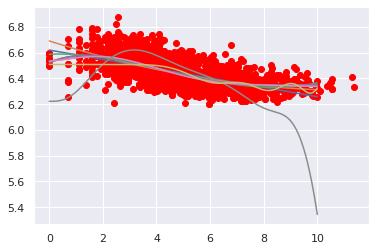

In [ ]:
# Problem 10: Repeat the above analyses using Lasso and Ridge regression.
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


plt.scatter(X_train.ravel(), y_train, color='red')

print("Model class: " + "Ridge Regression")
for degree in [1,2,3,4,5,6,7,20,25]:
  r=Ridge()
  model=make_pipeline(PolynomialFeatures(degree), r)
  model.fit(X_train, y_train)  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test,y_test)))   
  plt.plot(X_plot.ravel(), model.predict(X_plot), label='degree={0}'.format(degree))




Model class: Lasso Regression
	Degree 1
		Train R^2: 0.0
		Test R^2: -0.01184512328458398
		[ 0. -0.]
	Degree 2
		Train R^2: 0.12227604233216094
		Test R^2: 0.11800887094366863
		[ 0.         -0.         -0.00060566]
	Degree 3
		Train R^2: 0.26750779586723805
		Test R^2: 0.3077420716932542
		[ 0.        -0.        -0.        -0.0002613]
	Degree 4
		Train R^2: 0.3033773364565234
		Test R^2: 0.3449329830919752
		[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.28277183e-04
  1.82266632e-05]
	Degree 5
		Train R^2: 0.36954934578377246
		Test R^2: 0.4241207393942718
		[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.76228806e-04  1.60343985e-05]
	Degree 6
		Train R^2: 0.3654005788949643
		Test R^2: 0.4188554738068708
		[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.60100184e-04  1.26876621e-05  1.72762408e-07]
	Degree 7
		Train R^2: 0.4008132284326484
		Test R^2: 0.4611155626460997
		[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6980537575791947, tolerance: 0.0022837440893755355
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.894228710379729, tolerance: 0.0022837440893755355
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.139549730574293, tolerance: 0.0022837440893755355
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

	Degree 25
		Train R^2: 0.4181115549019648
		Test R^2: 0.4876214683994298
		[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.31554235e-04  6.47498056e-06  2.26340441e-06  5.18115826e-08
 -1.80135907e-09 -3.91622552e-10 -3.73769086e-11 -2.73736169e-12
 -1.65051455e-13 -7.77233357e-15 -1.86161410e-16  1.56533836e-17
  3.16412544e-18  3.57619461e-19  3.30801964e-20  2.71305277e-21
  2.01509192e-22  1.34222386e-23  7.58067592e-25  2.86059226e-26
 -7.34182384e-28 -3.31777085e-28]


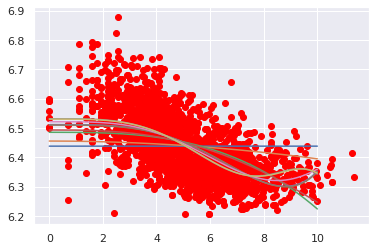

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
print("Model class: " + "Lasso Regression")

plt.scatter(X_train.ravel(), y_train, color='red')
for degree in [1,2,3,4,5,6,7,20,25]:
  r=Lasso()
  model=make_pipeline(PolynomialFeatures(degree), r)
  model.fit(X_train, y_train)
  
    
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test,y_test)))
  print("\t\t"+str(r.coef_)) 
     
  plt.plot(X_plot.ravel(), model.predict(X_plot), label='degree={0}'.format(degree))
 

***Question 7:*** What did you find using these regularization techniques? How were they similar or different to eachother and the results above? Why?

**Q7: The Lasso regression provided a better fit to the data than the Ridge expression since there's a negative R^2 value from Ridge regression which means it didn't provide a very reliable fit**

Now we will look at aniother dataset available [here](https://drive.google.com/file/d/1eaQSqiJFyrsDprmsKzZ0ysxBUmyBzVGX/view?usp=sharing).

This dataset is about morphological *regularity*&mdash;the property of whether words marke certain information like tense using regular endings (e.g., *walk*/*walked*) or irregular processes (e.g., *sing*/*sang*). The dataset consists of a Dutch verbs and is described in the following paper.


Tabak, W. M., Schreuder, R., and Baayen, R. H. (2005). [Lexical statistics and lexical processing: Semantic density, information complexity, sex, and irregularity in Dutch.](https://drive.google.com/file/d/1WRqjc7MwbCiSgOXESszBfxclnxQgAhu5/view?usp=sharing) In Kesper, S. and Reis, M., editors, Linguistic Evidence — Empirical, Theoretical, and Computational Perspectives, pages 529–555. Mouton de Gruyter, Berlin, Germany.



In [ ]:
#Problemm 11: Read in the regularity dataset and familiarize yourself with it.
import pandas as pd
df2 = pd.read_csv("/content/drive/My Drive/regularity.csv")
df2.head(20)

,Unnamed: 0,Verb,WrittenFrequency,FamilySize,LengthInLetters,VerbalSynsets,MeanBigramFrequency,NcountStem,Regularity,InflectionalEntropy,Auxiliary,Valency,NVratio,WrittenSpokenRatio
0,1,stelen,1.609438,2.564949,5,1,14.47,9,regular,1.00000,hebben,3,4.366913,-2.302585
1,2,tollen,5.411646,2.397895,3,1,13.61,26,regular,2.48640,zijnheb,3,-0.078927,-2.351375
2,3,blijken,9.883183,1.791759,5,1,13.84,6,irregular,2.00458,zijn,4,-3.192341,-1.526056
3,4,gloeien,6.908755,2.079442,5,3,12.95,4,regular,2.56009,hebben,5,-6.908755,1.791759
4,5,kakken,3.784190,2.079442,3,1,13.48,24,regular,1.99257,hebben,2,-0.526093,-1.386294
5,6,morren,5.438079,0.693147,3,1,14.20,19,regular,2.55696,hebben,2,-5.438079,2.833213
6,7,glimmen,7.025538,1.791759,4,2,12.86,7,irregular,2.25871,zijnheb,2,-7.025538,0.693147
7,8,rijzen,7.373374,2.197225,4,4,13.43,15,irregular,2.22852,zijn,2,-6.274762,1.098612
8,9,tieren,5.777652,1.386294,4,3,14.61,19,regular,2.51751,hebben,2,-5.777652,0.693147
9,10,werpen,8.493515,3.951244,4,3,13.68,8,irregular,2.14988,hebben,4,-8.493515,1.791759


Figure 1 in the paper displays the correlations between various factors (features) and predictability. 

***Question 8***: Briefly describe what each of the 5 factors  excluding  inflectional entropy, log argument structures, and log N-count means and what relationship it shows to regularity.

**Q8**: **log Lemma frequency**:the log value of summed frequencies of all   inflectional variants. It shows irregular verbs tend to be more frequent in lemma frequency.
**log familily size**:the log value for number of complex words in which the verb stem occurs as a constituent. It's not a significant predicator for the regularity of the word.
**Noun-verb frequency ratio**:the ratio of the nominal and verbal frequencies. The figure shows that regular tends to have higher noun freqency: 
**Spoken-written frequency ratio**:The verb frequency ratio in spoken and written Dutch. Regulars tend to have higher spoken frequency. 
**Auxiliary**: The distribution of auxiliary verbs. The auxiliary *zijin* is underrepresented in the regulars. 


In this section, we will focus on the relationship between `FamilySize` and `Regularity`. Unlike in the last dataset, regularity is not a continuous value, but rather a binary variable. Thus we will need to use a classification model to examine it.

For this pupose, we will use logistic regression.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.7714285714285715, 0.6857142857142857]

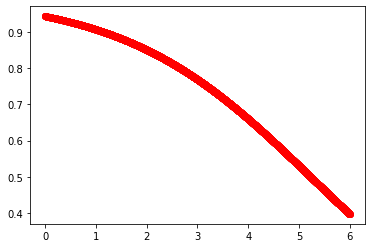

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
#This one is plotting with X_plot, and the one below plots with X_train
#Problem 12: set up X as FamilySize, y as Regularity in 
#preparation to use them to fit a logistic regression model.
X=df2['FamilySize']
y=df2['Regularity']


#Problem 13: split X, and y into train and test with 10% test split. And also create
# and X_plot variable for plotting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
X_plot = np.linspace(0, 6,5000).reshape(-1, 1)
#plt.scatter(X_train, y_train, color='red')
#Problem 14: fit a logistic regression model on this data
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)

display([accuracy_score(y_train, lr_model.predict(X_train)),accuracy_score(y_test, lr_model.predict(X_test))])

#Problem 15: using plt.plot make a scatter plot of the data along with the predicted 
# probability of regularity as a function of family size. you will find the "predict_proba" function helpful.
plt.scatter(X_plot.ravel(), lr_model.predict_proba(X_plot)[:,1], color='red')
#lr_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.7714285714285715, 0.6857142857142857]

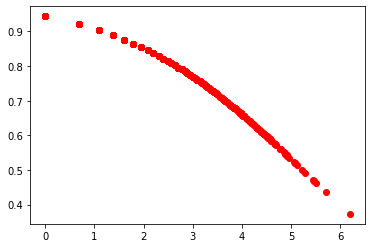

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#Problem 12: set up X as FamilySize, y as Regularity in 
#preparation to use them to fit a logistic regression model.
X=df2['FamilySize']
y=df2['Regularity']


#Problem 13: split X, and y into train and test with 10% test split. And also create
# and X_plot variable for plotting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
#plt.scatter(X_train, y_train, color='red')
#Problem 14: fit a logistic regression model on this data
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)

display([accuracy_score(y_train, lr_model.predict(X_train)),accuracy_score(y_test, lr_model.predict(X_test))])

#Problem 15: using plt.plot make a scatter plot of the data along with the predicted 
# probability of regularity as a function of family size. you will find the "predict_proba" function helpful.
plt.scatter(X_train.ravel(), lr_model.predict_proba(X_train)[:,1], color='red')

***Question 9***: What do you see in the fit to the logistic regression? How does the probability of being regular vary with morphological family size?

**Q9: The family size is negatively correlated with the regularity.**

***Question 10***: What does the relationship on Figure 1 of the paper look like? Does this match your analysis above?

**Q10: The plot in figure 1 is relatively flat(the X variable being log family size) but the plot here show's a regression**

In class, we saw an example of a regression problem in which the curve was best fit by a polynomial. We can, of course, use polynomial relationships in a classification model as well. Let's take a similar approach to the analysis that we just did, except first transforming our input features polynomially.

In [ ]:
import torch 
a=torch.rand(2,3,3)
b=a[:,0,:]
print(a)
print(b)

tensor([[[4.0662e-01, 9.4394e-01, 3.2588e-02],
         [9.3345e-01, 1.5614e-02, 4.3276e-01],
         [9.3756e-01, 3.4714e-02, 4.6286e-01]],

        [[6.1778e-02, 9.2953e-04, 1.1522e-01],
         [2.9518e-01, 7.6523e-01, 2.8623e-01],
         [9.6085e-01, 3.1612e-01, 8.9694e-01]]])
tensor([[4.0662e-01, 9.4394e-01, 3.2588e-02],
        [6.1778e-02, 9.2953e-04, 1.1522e-01]])


Model class: Logistic Regression
	Degree 1
		Train R^2: 0.7714285714285715
		Test R^2: 0.6857142857142857
	Degree 2
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857
	Degree 3
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857
	Degree 4
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857
	Degree 5
		Train R^2: 0.7825396825396825
		Test R^2: 0.6857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

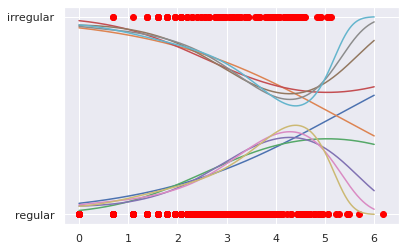

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

import  scipy

#Problem 16: Set up X, y, test and train as above.

X=df2['FamilySize']
y=df2['Regularity']
X_plot = np.linspace(0, 6,5000).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

#Problem 17: Plot the data points using plt.scatter.
plt.scatter(X_train, y_train, color='red')
print("Model class: " + "Logistic Regression")

X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
#X_plot=poly.fit_transform(X_plot).reshape(-1,1)
for degree in [1,2,3,4,5]:
  polylog=make_pipeline(PolynomialFeatures(degree),LogisticRegression())

  #poly = PolynomialFeatures(degree)
  #X_train=poly.fit_transform(X_train)
  #X_test=poly.fit_transform(X_test)
  #Problem 18: set up a logistic regression model with polynomial features of degree and train it.
  #X_train=PolynomialFeatures(degree).fit_transform(X_train)
  polylog.fit(X_train, y_train)
  #log.fit(X_train,y_train)
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(accuracy_score(y_train, polylog.predict(X_train))))
  print("\t\tTest R^2: "+ str(accuracy_score(y_test, polylog.predict(X_test))))

  #Problem 19: Plot the resulting predicted probability line on the plot.
  plt.plot(X_plot, polylog.predict_proba(X_plot), label='degree={0}'.format(degree))
  #plt.plot(X_train.ravel(), polylog.predict(X_train), color='black')

***Question 11***: What do you see in the fit of these polynomial features? What is the relationship in plain English between the family size variable and the probability of being regular?

**Q11: For regulars, the probability line first decrease and then increase, and for irregular, it's the reverse. We can say small family size tend to have more regulars but we can't tell for large family size because of the error**

***Question 12***: Speculate as to why this relationship might hold theoretically?

**Q12: Medium family size have less error thus it's easier to get a more accurate result.**